In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
file = pd.read_csv("cases_train_processed.csv")

In [4]:
file["date_confirmation"] = pd.to_datetime(file["date_confirmation"]).dt.strftime("%Y%m%d").astype(int)

In [5]:
file["additional_information"] = file["additional_information"].astype("category")
file["source"] = file["source"].astype("category")

In [6]:
le = LabelEncoder()
categories = ["sex", "province", "country", "additional_information", "source", "key"]
for i in categories:
    file[i] = le.fit_transform(file[i])

In [8]:
y = file["outcome"]
X = file.drop(["outcome"], axis = 1)

In [9]:
# Split dataset into training set and test set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size = 0.8, test_size = 0.20, random_state = 11)

In [10]:
#Create a Gaussian Classifier
RF_clf = RandomForestClassifier(max_depth = 22)

In [11]:
#Train the model using the training sets y_pred=clf.predict(X_test)
RF_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=22, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
# prediction on test set
RF_validation_prediction = RF_clf.predict(X_validation)
RF_training_prediction = RF_clf.predict(X_train)

In [13]:
RF_training_accuracy = accuracy_score(RF_training_prediction, y_train)
print("Random Forest training accuracy score: {0:0.4f}".format(RF_training_accuracy))
RF_training_metrics = classification_report(y_train, RF_training_prediction)
print("Training metrics: \n", RF_training_metrics)

Random Forest training accuracy score: 0.8780
Training metrics: 
                  precision    recall  f1-score   support

       deceased       0.98      0.25      0.40      3586
   hospitalized       0.79      0.88      0.84    100092
nonhospitalized       1.00      1.00      1.00    119928
      recovered       0.79      0.70      0.74     70494

       accuracy                           0.88    294100
      macro avg       0.89      0.71      0.74    294100
   weighted avg       0.88      0.88      0.87    294100



In [14]:
RF_validation_accuracy = accuracy_score(RF_validation_prediction, y_validation)
print("Random Forest validation accuracy score: {0:0.4f}".format(RF_validation_accuracy))
RF_validation_metrics = classification_report(y_validation, RF_validation_prediction)
print("Validation metrics: \n", RF_validation_metrics)

Random Forest validation accuracy score: 0.8652
Validation metrics: 
                  precision    recall  f1-score   support

       deceased       0.71      0.11      0.19       913
   hospitalized       0.78      0.88      0.83     24908
nonhospitalized       0.99      0.99      0.99     30062
      recovered       0.77      0.67      0.72     17643

       accuracy                           0.87     73526
      macro avg       0.81      0.66      0.68     73526
   weighted avg       0.86      0.87      0.86     73526



In [159]:
RF_max_depth = np.arange(1, 31) 
RF_train_accuracy = np.empty(len(RF_max_depth)) 
RF_test_accuracy = np.empty(len(RF_max_depth)) 

In [161]:
for i, depth in enumerate(RF_max_depth):
    
    RF_classifier = RandomForestClassifier(max_depth = depth)
    RF_classifier.fit(X_train, y_train) 

    RF_validation_pred = RF_classifier.predict(X_validation)
    RF_training_pred = RF_classifier.predict(X_train)
    
    RF_train_accuracy[i] = accuracy_score(RF_training_pred, y_train)
    RF_test_accuracy[i] = accuracy_score(RF_validation_pred, y_validation)

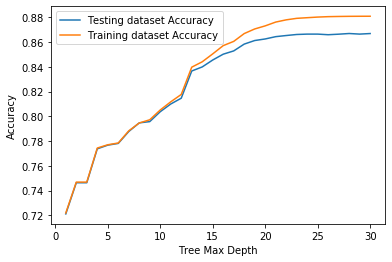

In [162]:
# Generate plot 
plt.plot(RF_max_depth, RF_test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(RF_max_depth, RF_train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('Tree Max Depth') 
plt.ylabel('Accuracy') 
plt.show() 